# Modelo AutoRegressivo

Utilizando modelo autoregressivo para modelar a série temporal

Utilizaremos uma série temporal da temperatura na cidade australiana de Melbourne

* Importando biblitecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo CSV

In [2]:
dados = pd.read_csv('daily-min-temperatures.csv')

Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


* Definindo data como índice

In [4]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados = dados.set_index('Date')

* Graficando série temporal

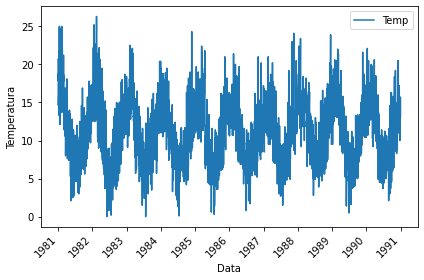

In [5]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.tight_layout()

In [6]:
t_treino = dados[dados.index<'1990-01-01'].index.values
t_teste = dados[dados.index>='1990-01-01'].index.values
X_treino = dados[dados.index<'1990-01-01'].values
X_teste = dados[dados.index>='1990-01-01'].values

* Aplicando modelo autoregressivo

In [7]:
from statsmodels.tsa.ar_model import AutoReg

In [8]:
modelo = AutoReg(X_treino, 1)
resultado = modelo.fit()
print(resultado.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3285
Model:                     AutoReg(1)   Log Likelihood               -7780.713
Method:               Conditional MLE   S.D. of innovations              2.587
Date:                Fri, 18 Sep 2020   AIC                              1.903
Time:                        13:55:10   BIC                              1.908
Sample:                             1   HQIC                             1.905
                                 3285                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5141      0.131     19.229      0.000       2.258       2.770
y.L1           0.7737      0.011     70.136      0.000       0.752       0.795
                                    Roots           

In [9]:
resultado2 = modelo.fit(cov_type="HC0")
print(resultado2.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3285
Model:                     AutoReg(1)   Log Likelihood               -7780.713
Method:               Conditional MLE   S.D. of innovations              2.587
Date:                Fri, 18 Sep 2020   AIC                              1.903
Time:                        13:55:14   BIC                              1.908
Sample:                             1   HQIC                             1.905
                                 3285                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5141      0.132     19.005      0.000       2.255       2.773
y.L1           0.7737      0.012     65.186      0.000       0.750       0.797
                                    Roots           

* Coeficientes

In [10]:
print('Coefficients: %s' % resultado2.params)

Coefficients: [2.51407022 0.77374888]


* Fazendo predições

In [11]:
X_pred = resultado2.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1, dynamic=False)

* Calculando erros

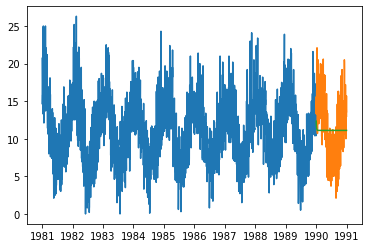

In [12]:
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)

* Calculando erros

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
MSE = mean_squared_error(X_teste,X_pred)

In [15]:
RMSE = np.sqrt(MSE)

In [16]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.88
